# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

Rephrasing this into a technical data science problem, can we accurately predict the price of a used car given different features of said car? Which features are the most important for predicting price? After determining the most important features, predict the price of a car using a regression model.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To get familiar with the data, I will first examine the different rows and columns in the dataset. What features do we have? We can start to think about which features might be useful and which might not be. We can think back to our business problem to determine which features the customer actually cares about. We might be able to use some common sense and remove any columns that we know for sure will not be useful to us.

We will also use graphs to visualize the data and get a better understanding of it. Visualizing the data may help us identify if we need to perform any transformations.

In [78]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from warnings import filterwarnings
filterwarnings('ignore')

In [79]:
# Read csv and create dataframe
vehicles = pd.read_csv('data/vehicles.csv')

In [80]:
vehicles

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [81]:
vehicles.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
222604,7307694344,springfield,14259,2019.0,chevrolet,spark,NaN,NaN,gas,24110.0,clean,automatic,NaN,fwd,NaN,hatchback,NaN,mo
408659,7316607003,seattle-tacoma,7495,2006.0,honda,cr-v,excellent,4 cylinders,gas,149916.0,clean,automatic,JHLRD78596C049258,4wd,mid-size,SUV,grey,wa
279261,7309746982,rochester,19995,2009.0,ram,pickup 1500,NaN,NaN,gas,73582.0,clean,automatic,1D3HV18T09S775769,NaN,NaN,NaN,NaN,ny
390906,7311446177,fredericksburg,0,2015.0,chevrolet,silverado,NaN,NaN,gas,62801.0,clean,automatic,3GCPCTECXFG374405,rwd,NaN,pickup,black,va
7252,7305046686,anchorage / mat-su,9900,2008.0,nissan,juke sv,excellent,4 cylinders,gas,129000.0,clean,automatic,NaN,4wd,full-size,hatchback,yellow,ak
318501,7308325745,eugene,5995,2012.0,chevrolet,impala,NaN,NaN,gas,196234.0,clean,automatic,2G1WG5E38C1270410,NaN,NaN,NaN,NaN,or
408010,7316822200,seattle-tacoma,0,2017.0,ford,f-350 super duty xlt,NaN,8 cylinders,diesel,90434.0,clean,automatic,1FT8W3BT6HED88957,4wd,NaN,truck,NaN,wa
371351,7314974931,dallas / fort worth,19991,2015.0,ford,f-150,NaN,6 cylinders,gas,71892.0,clean,automatic,NaN,rwd,full-size,pickup,white,tx
186819,7315134421,boston,800,2008.0,subaru,forester,fair,4 cylinders,gas,167700.0,clean,automatic,NaN,NaN,NaN,NaN,blue,ma
144545,7315180580,rockford,460,2021.0,chrysler,pacifica,NaN,6 cylinders,gas,11.0,clean,automatic,NaN,fwd,NaN,van,white,il


In [82]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

After initial examination of the data, I see some data that I would like to remove or investigate further. We do not need the Id column as we already have indices for our dataframe and this will not help us solve our problem. I will also remove the VIN column because a VIN number will not help us predict price. I also think that we may want to remove the locations (state and region). I see a lot of missing values in this data that we will need to clean up.

In [83]:
vehicles.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,426880.0,NaN,NaN,NaN,7311486634.22,4473170.41,7207408119.0,7308143339.25,7312620821.0,7315253543.5,7317101084.0
region,426880,404,columbus,3608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,426880.0,NaN,NaN,NaN,75199.03,12182282.17,0.0,5900.0,13950.0,26485.75,3736928711.0
year,425675.0,NaN,NaN,NaN,2011.24,9.45,1900.0,2008.0,2013.0,2017.0,2022.0
manufacturer,409234,42,ford,70985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,421603,29649,f-150,8009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,252776,6,good,121456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,249202,8,6 cylinders,94169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,423867,5,gas,356209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,422480.0,NaN,NaN,NaN,98043.33,213881.5,0.0,37704.0,85548.0,133542.5,10000000.0


After using the describe method, I see there are some outliers in our data that are most likely input errors that will need to be removed. The max value of the price column is over $3 billion and the max value for the odometer is 10 million.

In [84]:
# Sort price column values in ascending order with value counts
vehicles['price'].value_counts().sort_index()

,count
price,
0,32895
1,1951
2,13
3,9
4,4
...,...
1234567890,1
1410065407,1
3009548743,1


In [85]:
# Sort odometer column values in ascending order with value counts
vehicles['odometer'].value_counts().sort_index()

,count
odometer,
0.0,1965
1.0,2246
2.0,153
3.0,58
4.0,138
...,...
9099999.0,1
9750924.0,1
9876543.0,1


Diving deeper into the price and odometer columns, we can see that there are a lot of absurdly large values in both columns. We will remove these. I also see a lot of cars that were the price of 0 or close to it. These might've been gifts and I believe this will not be of any use to our customer.

In [86]:
vehicles['model'].value_counts()

,count
model,
f-150,8009
silverado 1500,5140
1500,4211
camry,3135
silverado,3023
...,...
plymouth fury 1,1
f550 box truck delivery,1
duramax 2500hd,1


Looking into the models, I see there might be a lot of different entries that all relate to the same car. I see "silverado 1500", "1500", and "silverado". I think there might just be too many vehicle models here for it to be useful for our customer.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [87]:
# Drop columns not useful to customer
vehicles = vehicles.drop(columns=['id', 'VIN', 'region', 'state', 'model'])

In [88]:
# Drop missing values
vehicles = vehicles.dropna()

In [89]:
vehicles

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black
55,19900,2004.0,ford,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue
59,14000,2012.0,honda,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver
65,22500,2001.0,ford,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white
73,15000,2017.0,dodge,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,18000,2005.0,chevrolet,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,blue
426809,18000,1990.0,jeep,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV,black
426831,9800,1985.0,nissan,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,red
426833,6800,1997.0,jaguar,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white


In [90]:
vehicles.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,80170.0,NaN,NaN,NaN,79539.19,13791527.85,0.0,4950.0,9000.0,17500.0,3736928711.0
year,80170.0,NaN,NaN,NaN,2008.31,10.34,1900.0,2005.0,2011.0,2014.0,2022.0
manufacturer,80170,41,ford,15659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,80170,6,excellent,39843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,80170,8,6 cylinders,27370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,80170,5,gas,73452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,80170.0,NaN,NaN,NaN,124814.67,249484.9,0.0,73000.0,114000.0,155467.5,10000000.0
title_status,80170,6,clean,75372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,80170,3,automatic,73272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive,80170,3,4wd,33800,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# See largest odometer values
vehicles['odometer'].nlargest(600).value_counts().sort_index()

,count
odometer,
311000.0,2
311175.0,2
311341.0,3
311500.0,1
311578.0,1
...,...
9000000.0,1
9099999.0,1
9750924.0,1


In [92]:
vehicles['price'].nlargest(30).value_counts().sort_index()

,count
price,
135000,3
140000,2
144832,1
150000,5
155000,1
165000,1
169999,1
195000,1
1111111,1


In [93]:
# Define IQR and find outliers for price
Q1 = vehicles['price'].quantile(0.25)
Q3 = vehicles['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
vehicles = vehicles[(vehicles['price'] >= lower_bound) & (vehicles['price'] <= upper_bound)]

In [94]:
# Define IQR and find outliers for odometer
Q1 = vehicles['odometer'].quantile(0.25)
Q3 = vehicles['odometer'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
vehicles = vehicles[(vehicles['odometer'] >= lower_bound) & (vehicles['odometer'] <= upper_bound)]

In [95]:
vehicles.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,74501.0,NaN,NaN,NaN,11026.32,8568.12,0.0,4750.0,8699.0,15500.0,36300.0
year,74501.0,NaN,NaN,NaN,2008.07,10.02,1905.0,2005.0,2010.0,2014.0,2022.0
manufacturer,74501,41,ford,13886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,74501,6,excellent,37307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,74501,8,4 cylinders,25864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,74501,5,gas,69808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,74501.0,NaN,NaN,NaN,117698.88,57363.73,0.0,77547.0,116000.0,156000.0,277925.0
title_status,74501,6,clean,70015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,74501,3,automatic,68046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive,74501,3,4wd,29808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
vehicles['price'].nlargest(10).value_counts().sort_index()

,count
price,
36000,5
36223,2
36250,1
36294,1
36300,1


In [97]:
vehicles['price'].nsmallest(100).value_counts().sort_index()

,count
price,
0,100


In [98]:
vehicles['odometer'].nlargest(10).value_counts().sort_index()

,count
odometer,
277450.0,4
277542.0,1
277702.0,1
277710.0,1
277900.0,1
277913.0,1
277925.0,1


In [99]:
# Limit price column to cars 1000 or higher
vehicles = vehicles[(vehicles['price'] >= 1000)]

I removed the extremely high outliers in both the price and odometer columns. I used the IQR method to remove those data points higher or lower than 1.5 * IQR. I am only interested in cars that sold for more than $1000 because the customer is trying to make money and these 0 priced "sales" won't matter to them. Generally the most amount of miles that a car can be expected to make it to is 300k so I am happy with the largest odometer values being around 277k.

Without knowing more information about our customer, I'm going to assume that as a used car salesman he is probably not interested in the sale of very expensive luxury or sports cars. Removing the high price datapoints should remove these cars from our dataset.

In [100]:
vehicles

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black
55,19900,2004.0,ford,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue
59,14000,2012.0,honda,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver
65,22500,2001.0,ford,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white
73,15000,2017.0,dodge,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426793,15999,2018.0,chevrolet,excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black
426808,18000,2005.0,chevrolet,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,blue
426809,18000,1990.0,jeep,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV,black
426831,9800,1985.0,nissan,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,red


In [101]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69057 entries, 31 to 426833
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         69057 non-null  int64  
 1   year          69057 non-null  float64
 2   manufacturer  69057 non-null  object 
 3   condition     69057 non-null  object 
 4   cylinders     69057 non-null  object 
 5   fuel          69057 non-null  object 
 6   odometer      69057 non-null  float64
 7   title_status  69057 non-null  object 
 8   transmission  69057 non-null  object 
 9   drive         69057 non-null  object 
 10  size          69057 non-null  object 
 11  type          69057 non-null  object 
 12  paint_color   69057 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 7.4+ MB


In [102]:
vehicles.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,69057.0,NaN,NaN,NaN,11888.1,8308.56,1000.0,5500.0,9400.0,16450.0,36300.0
year,69057.0,NaN,NaN,NaN,2007.79,10.02,1905.0,2005.0,2010.0,2014.0,2022.0
manufacturer,69057,40,ford,13028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,69057,6,excellent,33763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,69057,8,4 cylinders,24206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,69057,5,gas,64724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,69057.0,NaN,NaN,NaN,119746.65,56850.45,0.0,80078.0,118261.0,157502.0,277925.0
title_status,69057,6,clean,64707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,69057,3,automatic,63359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive,69057,3,4wd,27220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


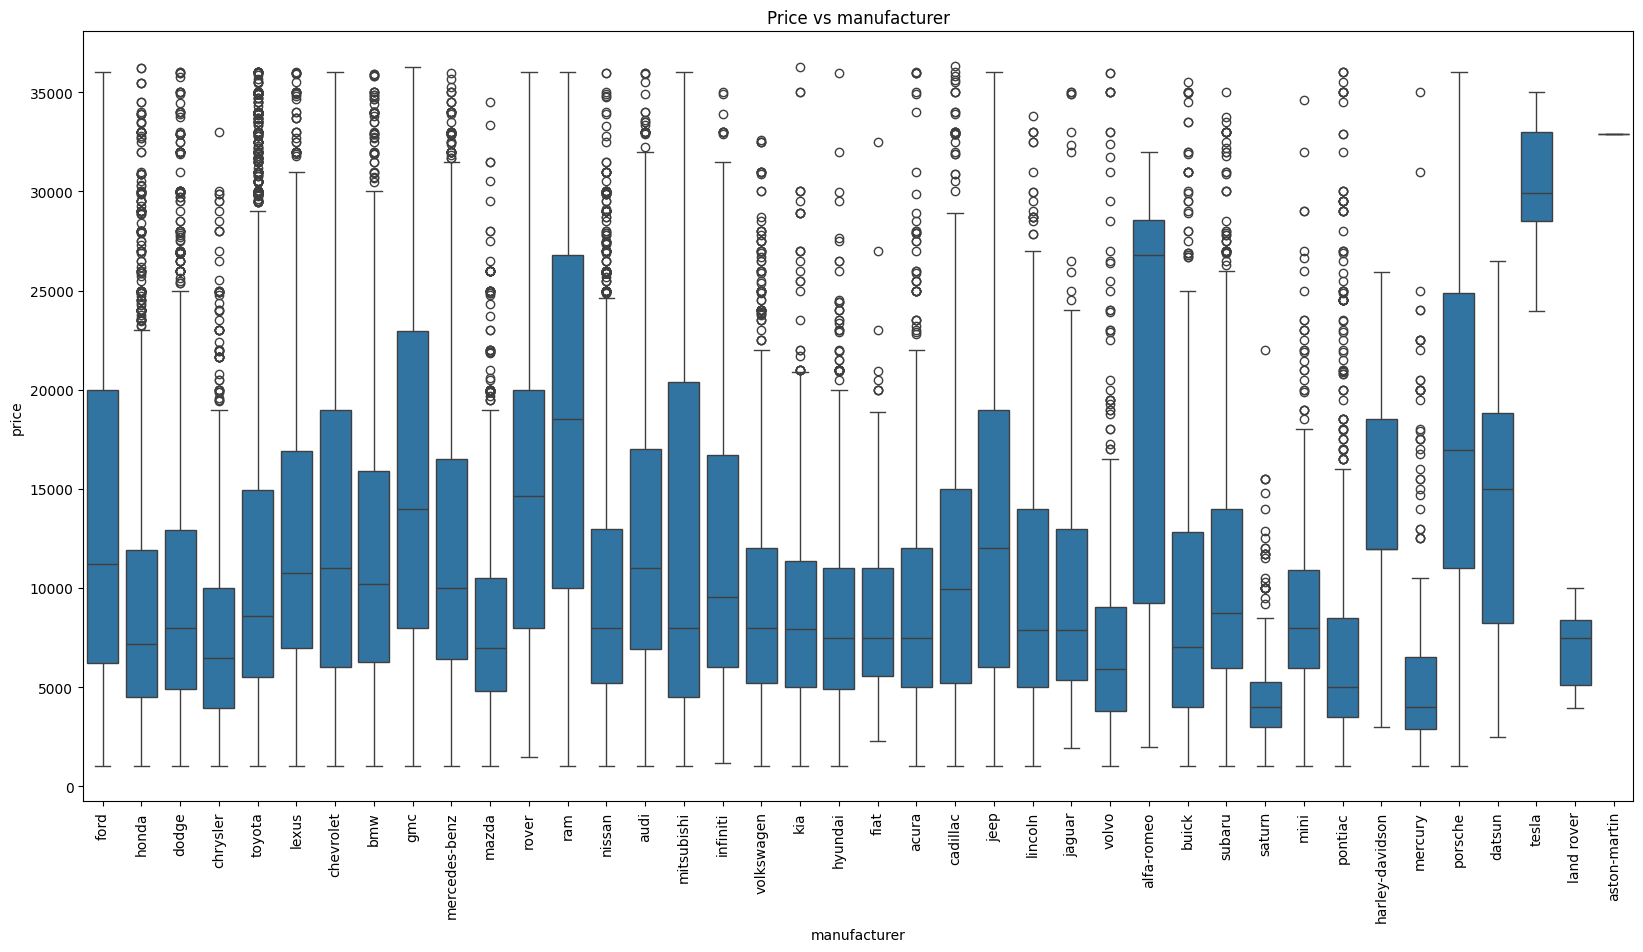

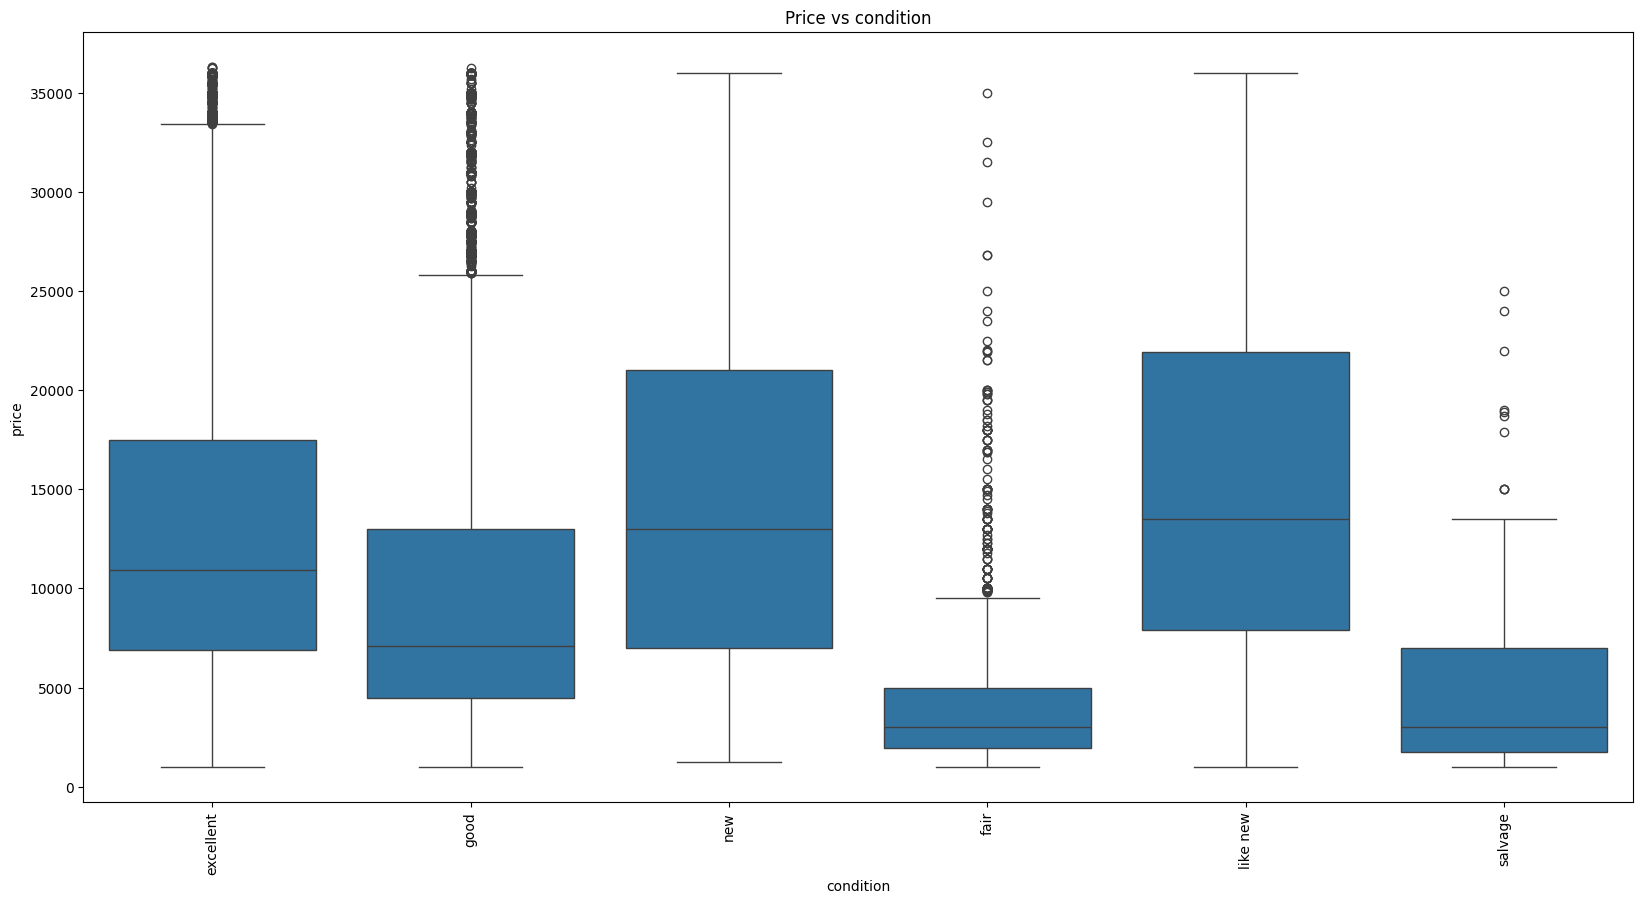

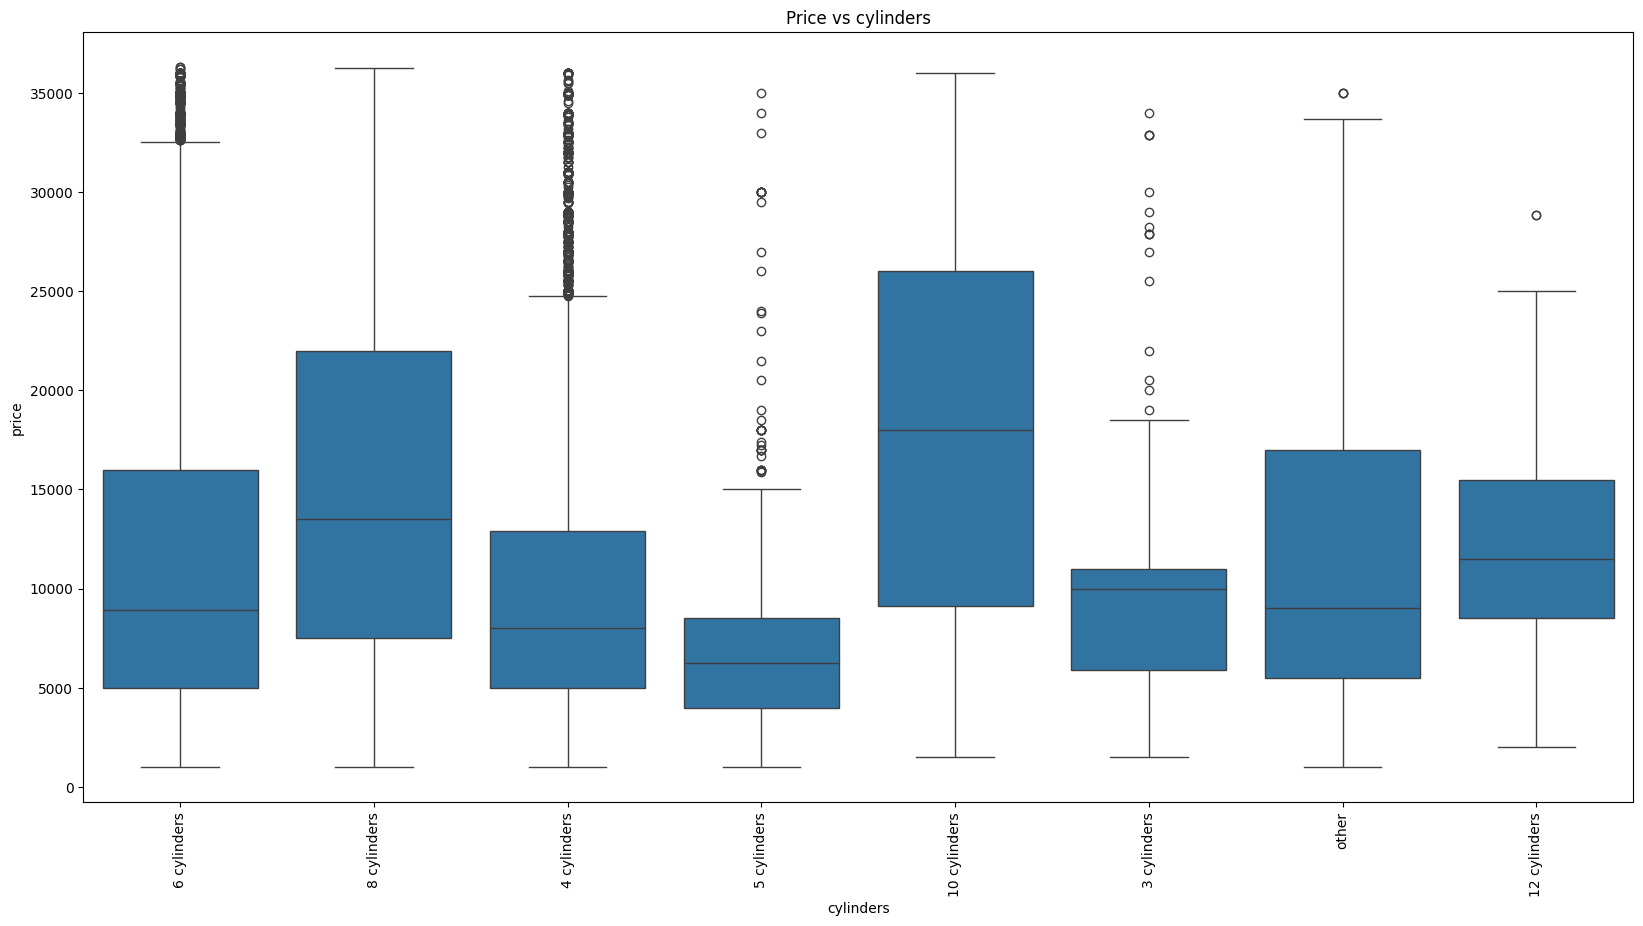

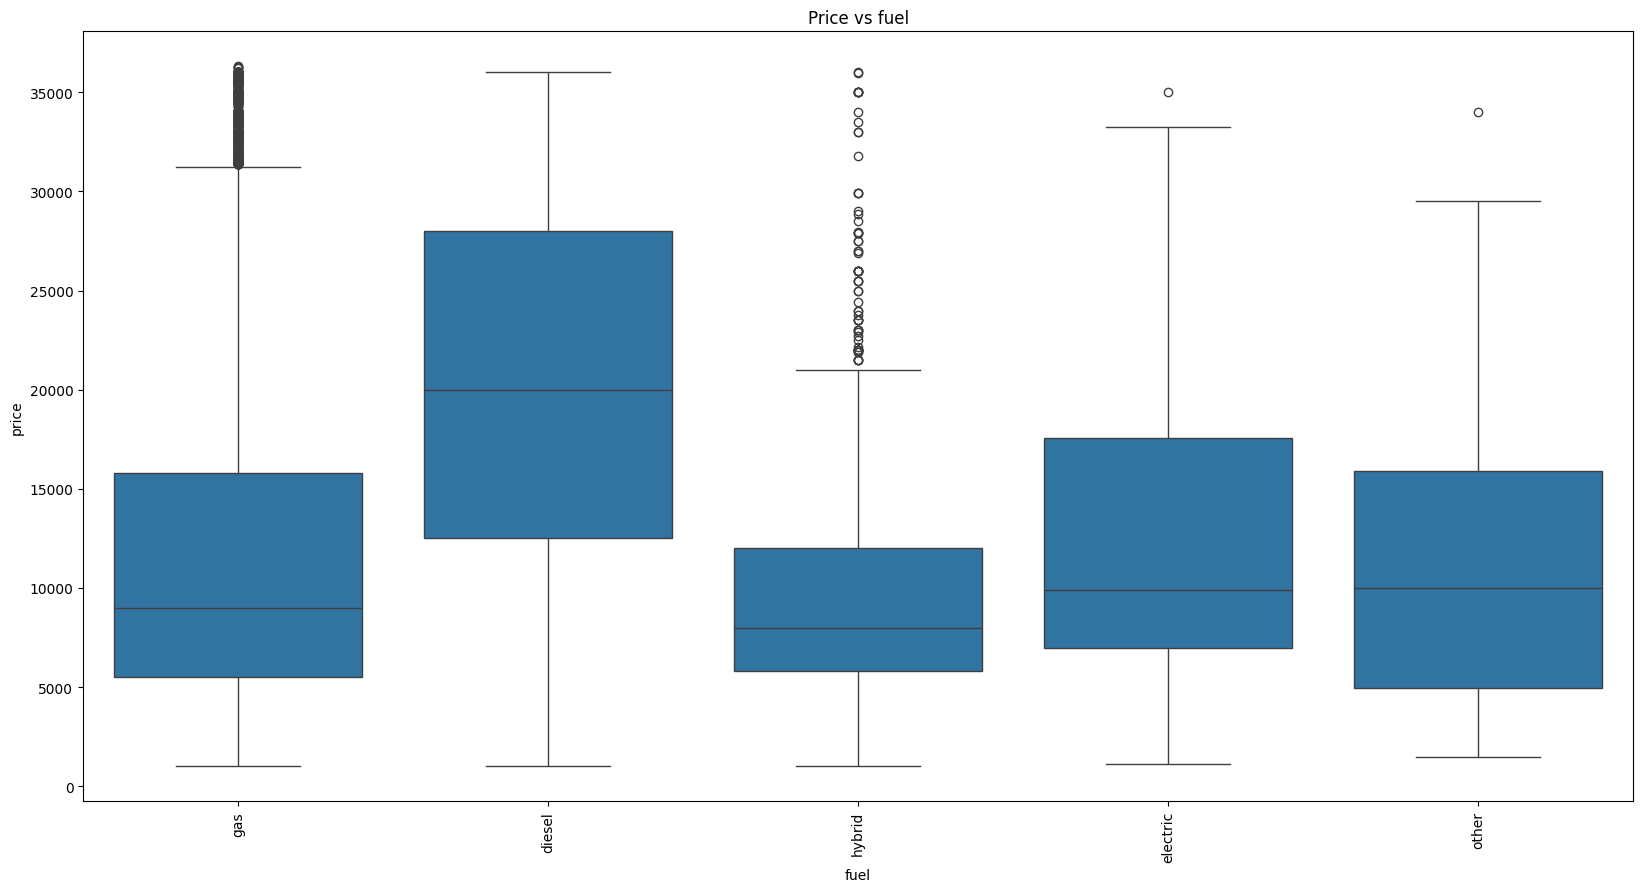

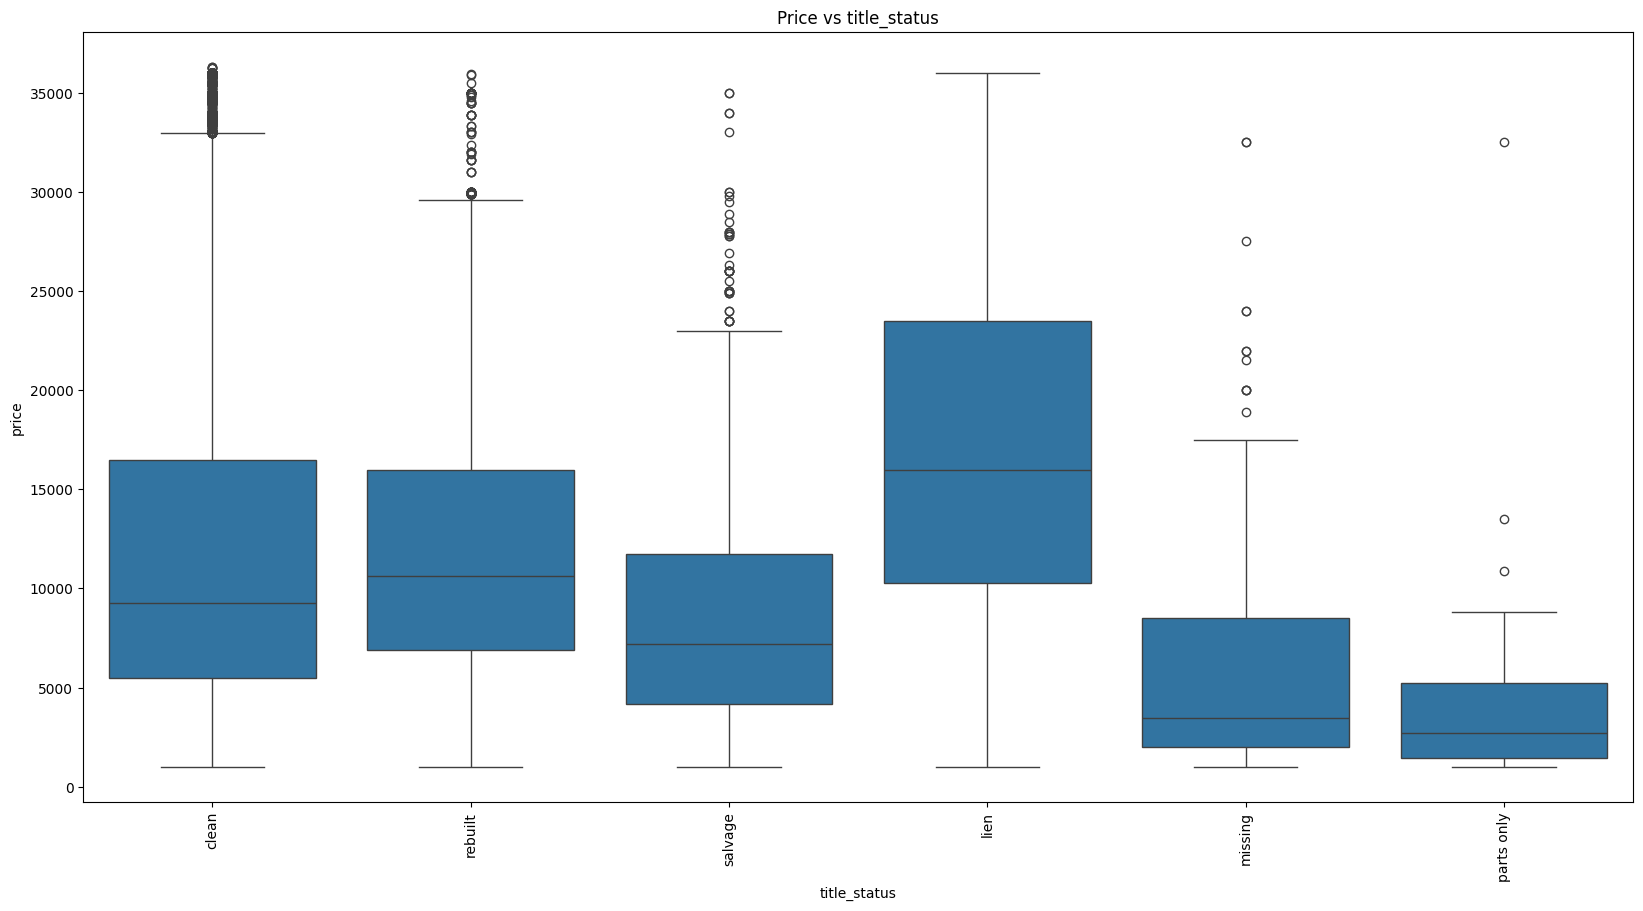

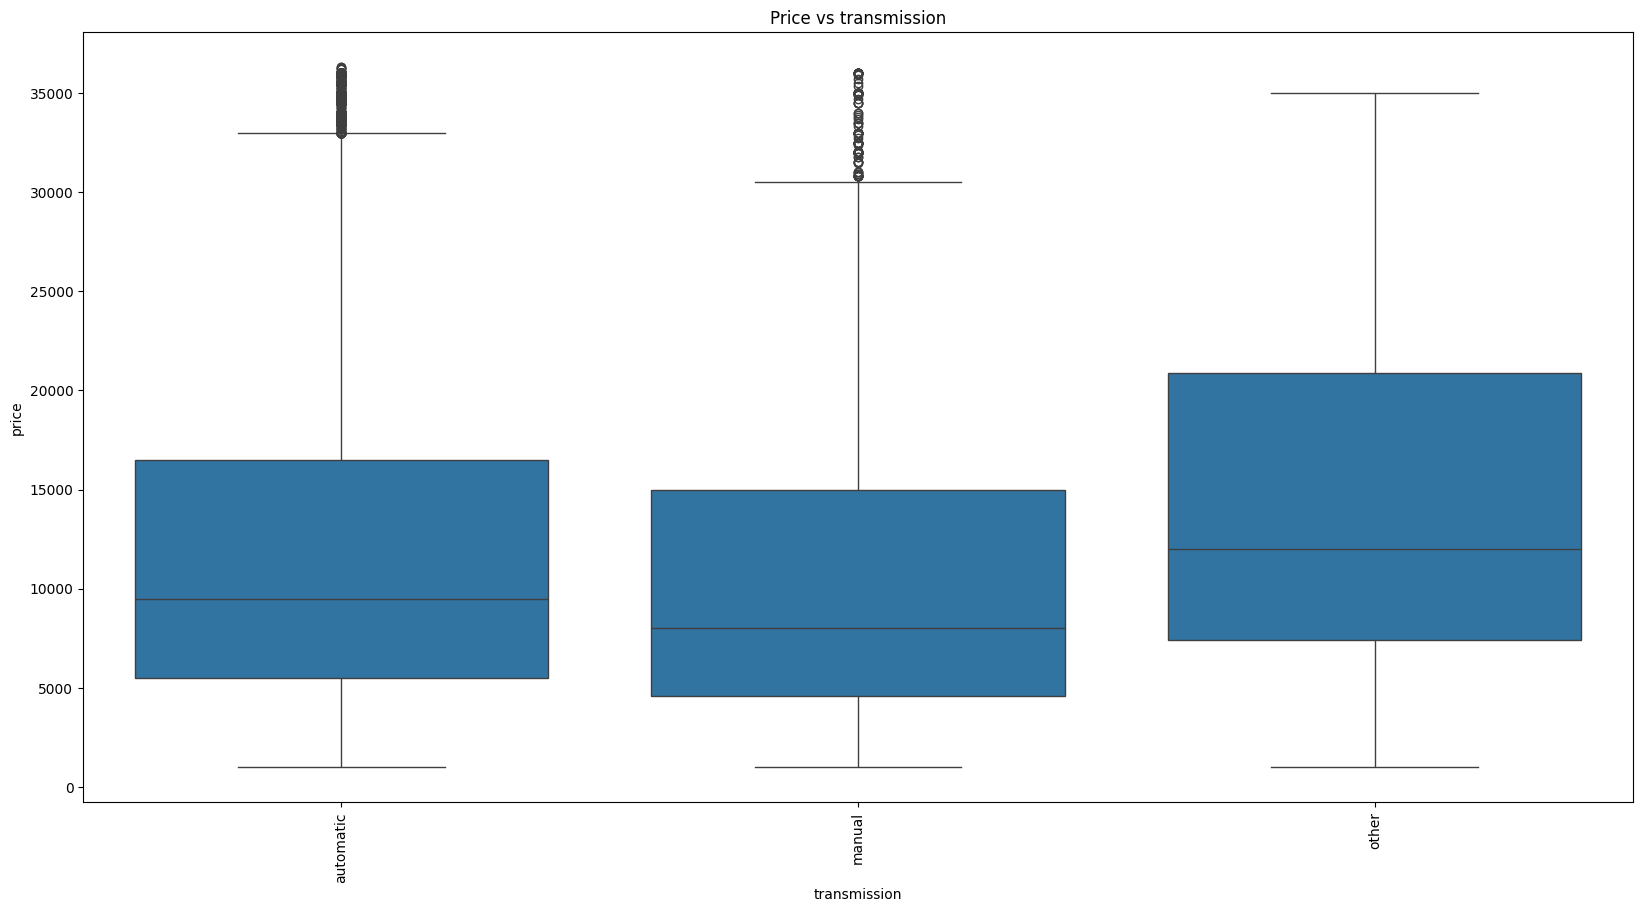

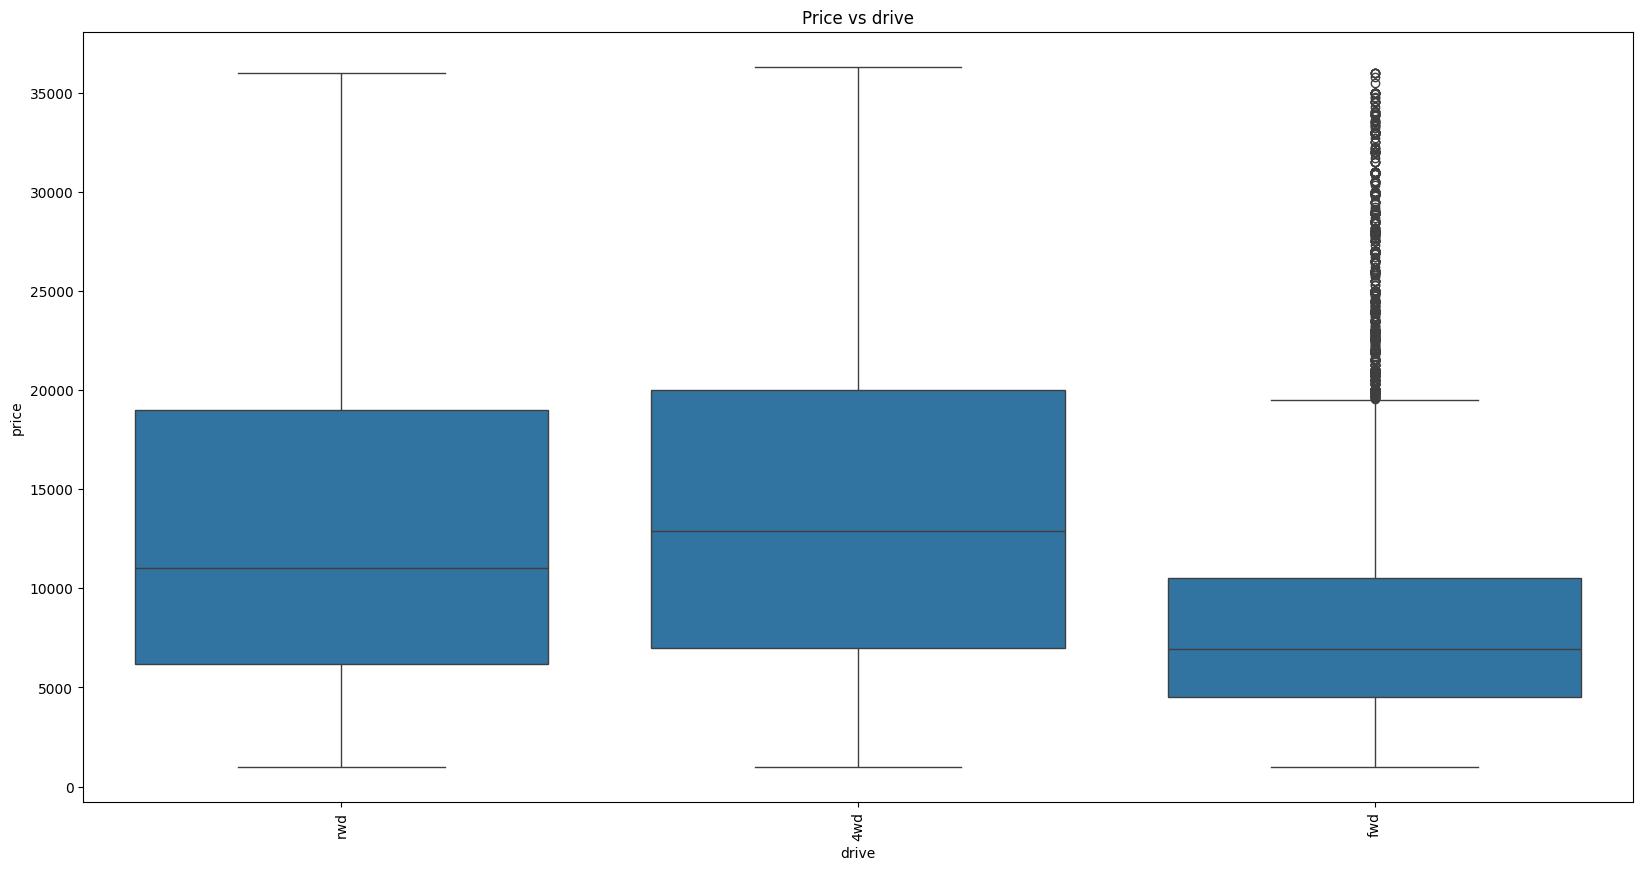

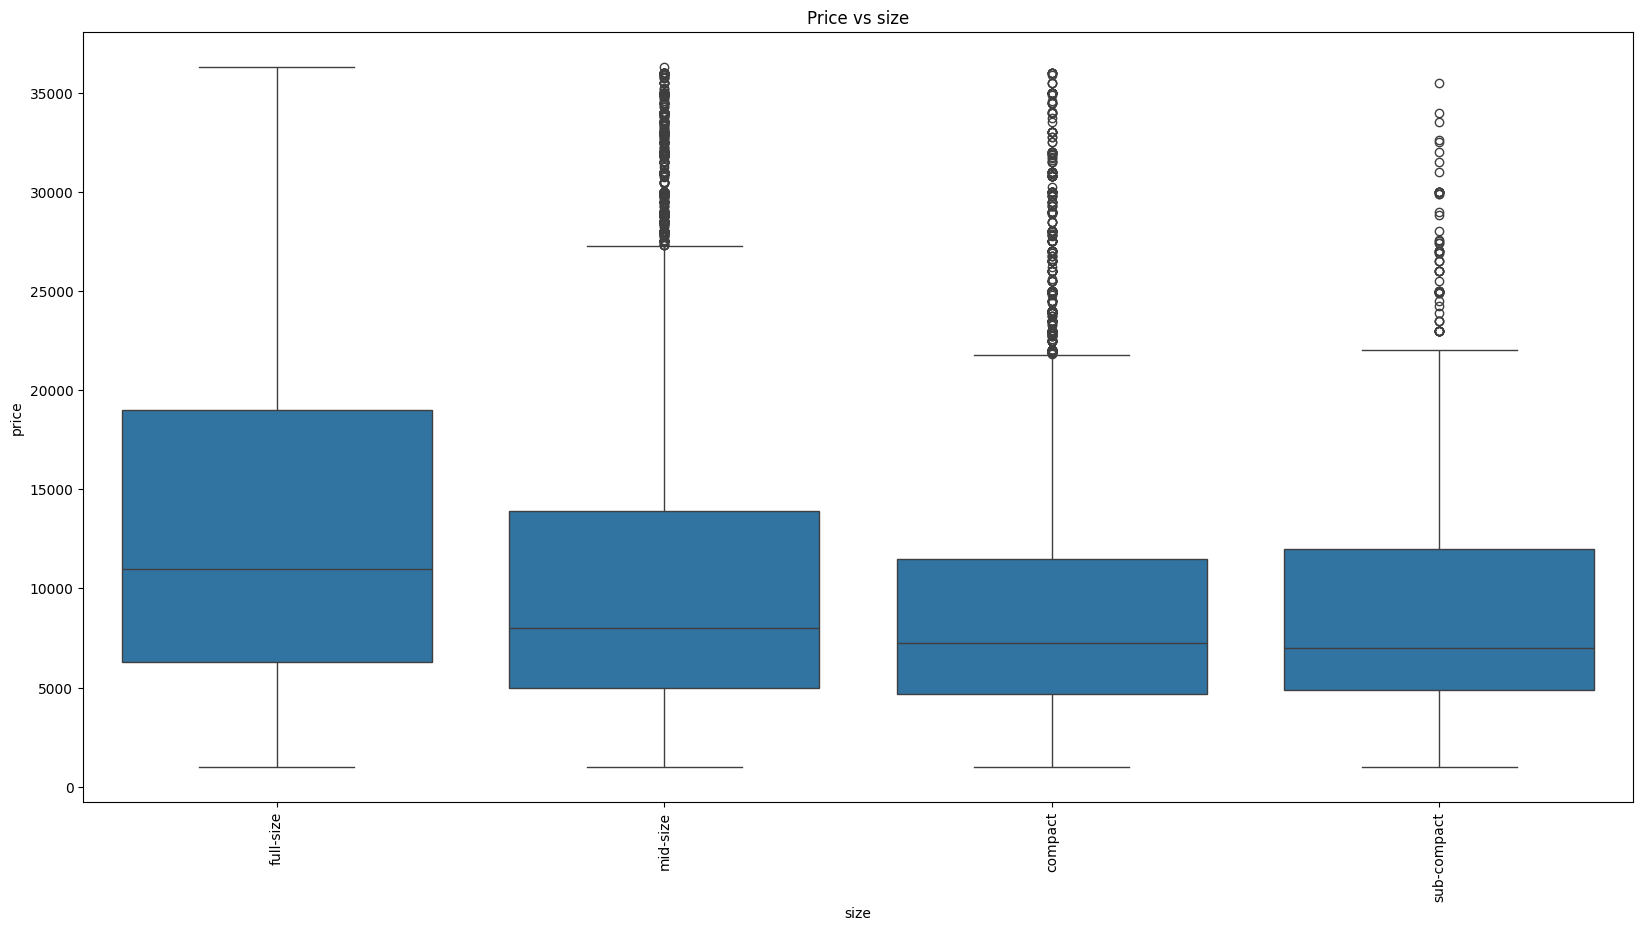

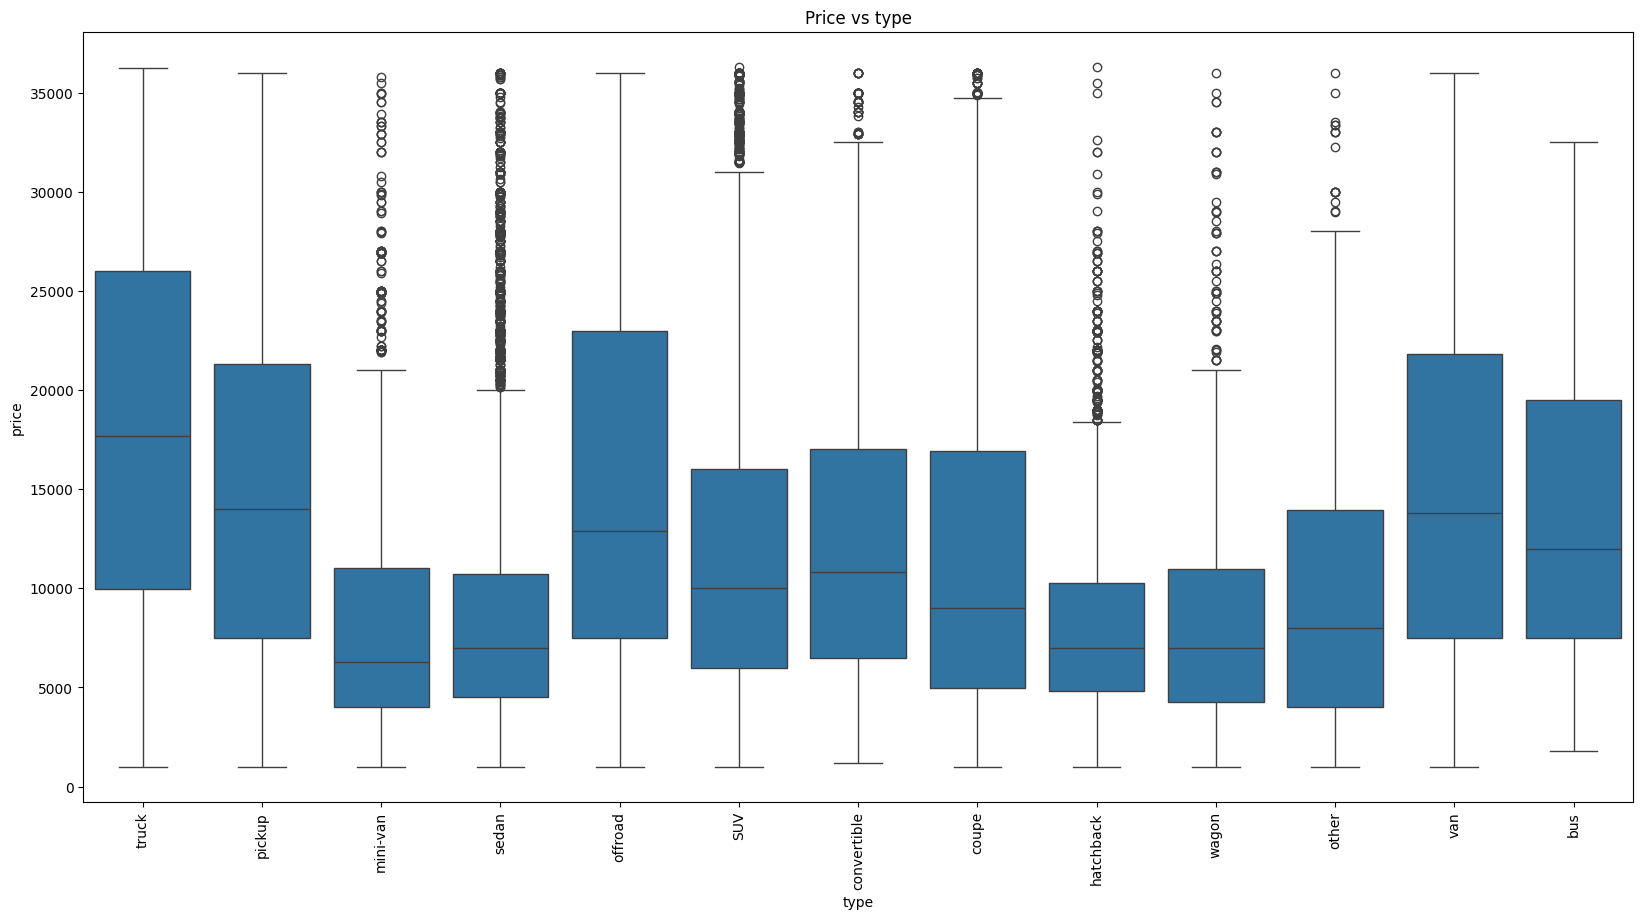

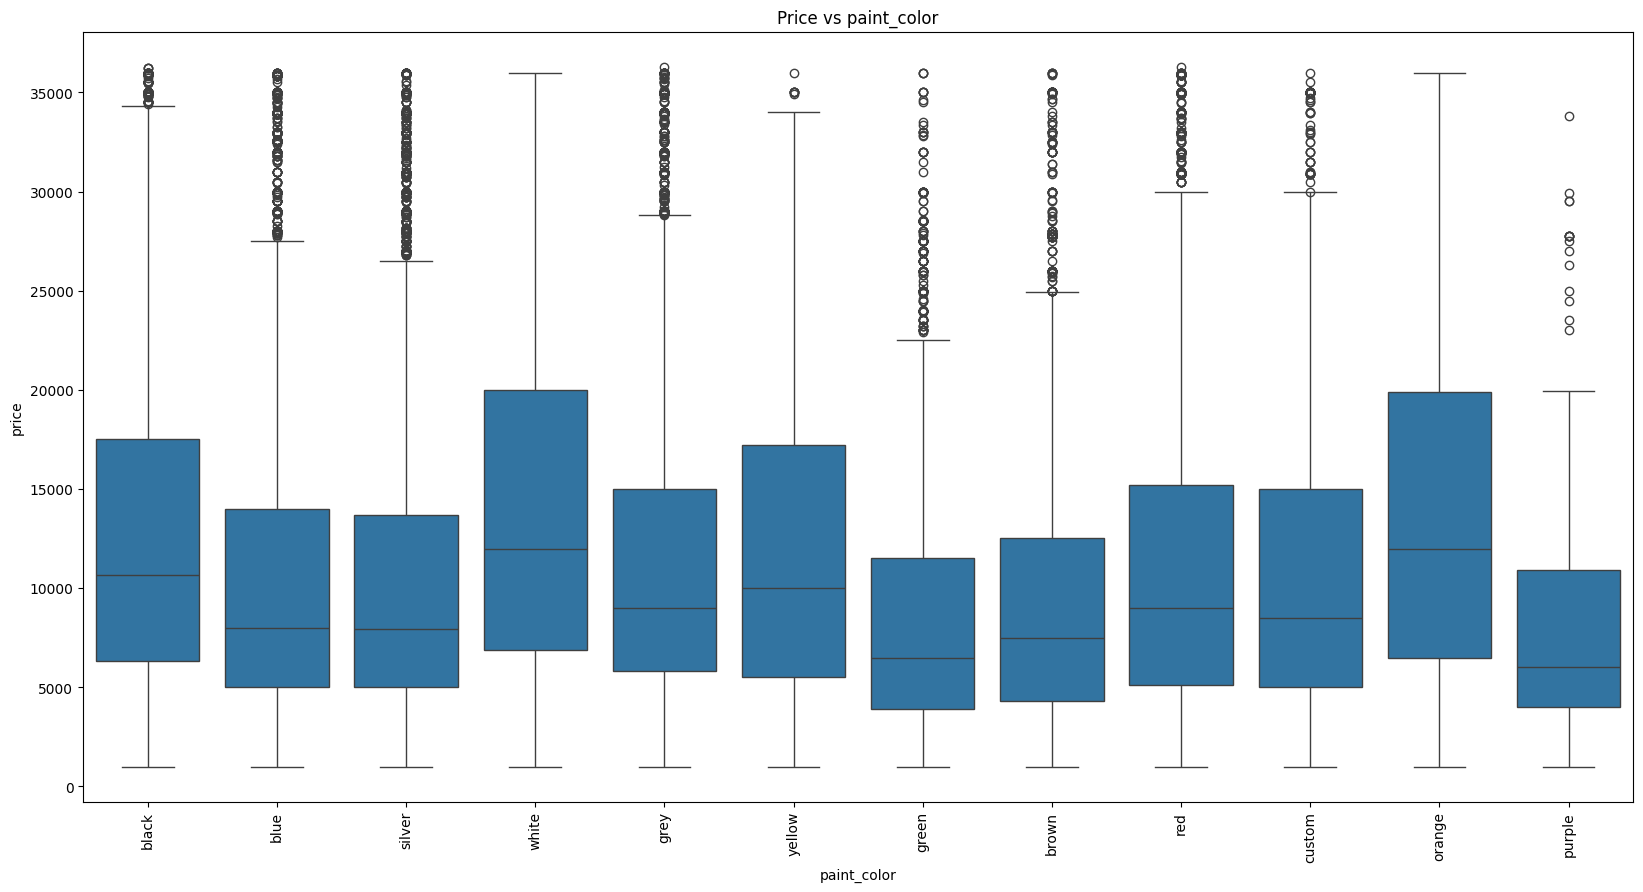

In [103]:
# Select all the categorical columns in our vehicles dataframe
object_columns = vehicles.select_dtypes(include='object').columns

# Plot each categorical column and price
for col in object_columns:
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=vehicles, x=vehicles[col], y=vehicles['price'])
    plt.title("Price vs " + col)
    plt.xticks(rotation=90)
    plt.show()


After looking at these plots and in an effort to further reduce dimensionality/overfitting, I'm going to remove the manufacturer and color columns from our dataset. Without knowing more information about the customer, I'm going to assume they are more interested in other aspects of the cars.

Features like condition of the car, title status, type, and mileage might be of more value.

In [104]:
# Remove manufacturer feature from dataset
vehicles = vehicles.drop(columns=['manufacturer', 'paint_color'])

In [105]:
vehicles

,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type
31,15000,2013.0,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck
55,19900,2004.0,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup
59,14000,2012.0,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van
65,22500,2001.0,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck
73,15000,2017.0,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan
...,...,...,...,...,...,...,...,...,...,...,...
426793,15999,2018.0,excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan
426808,18000,2005.0,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck
426809,18000,1990.0,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV
426831,9800,1985.0,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback


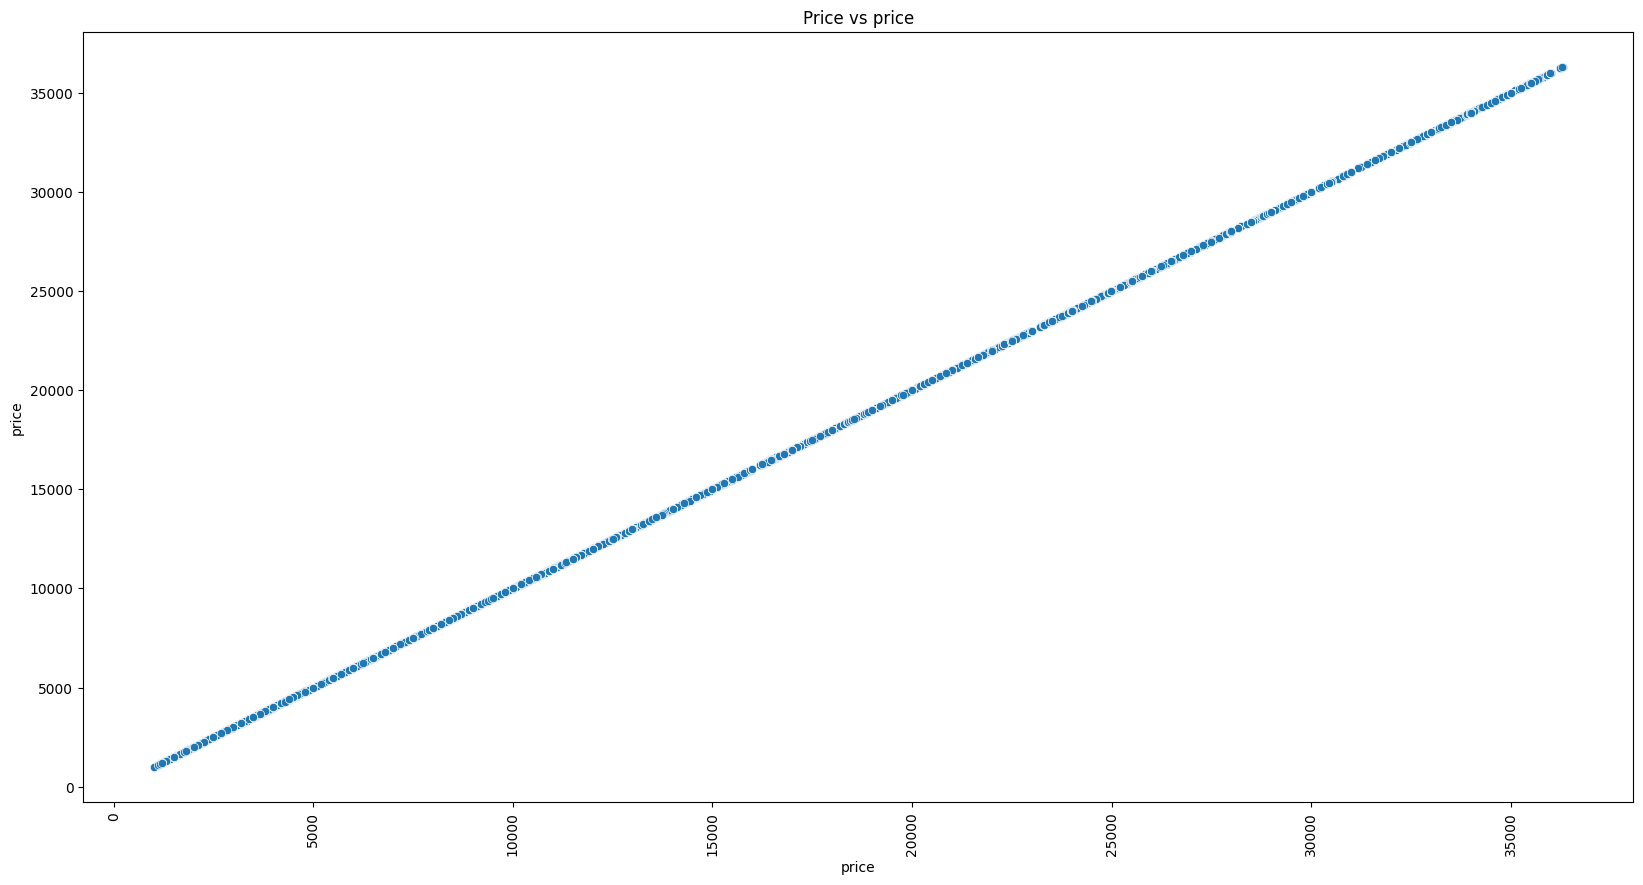

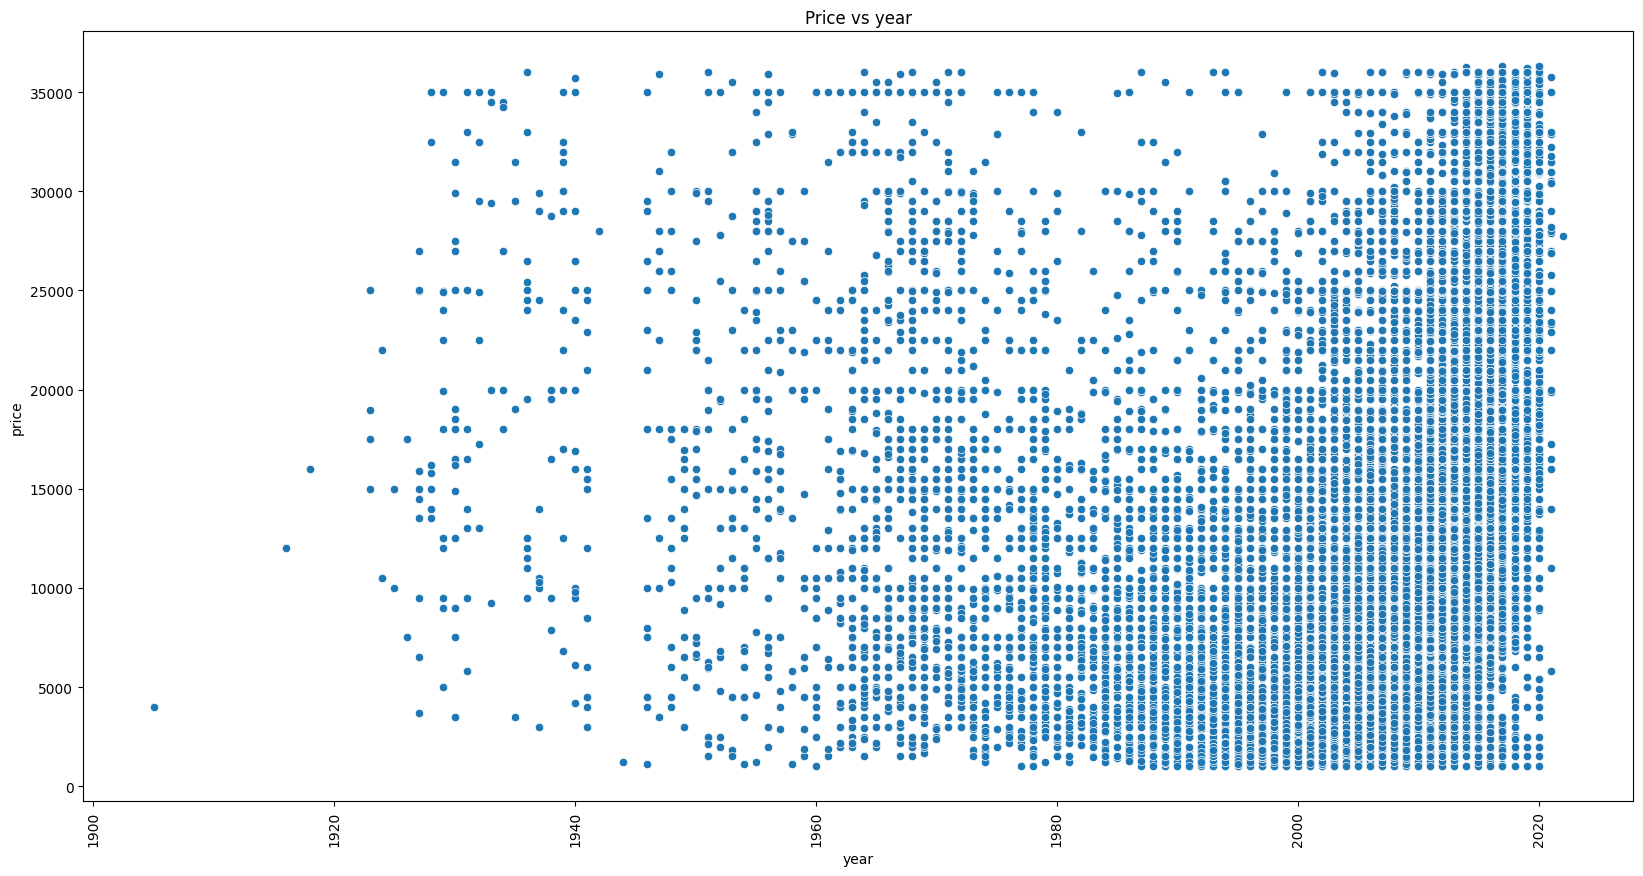

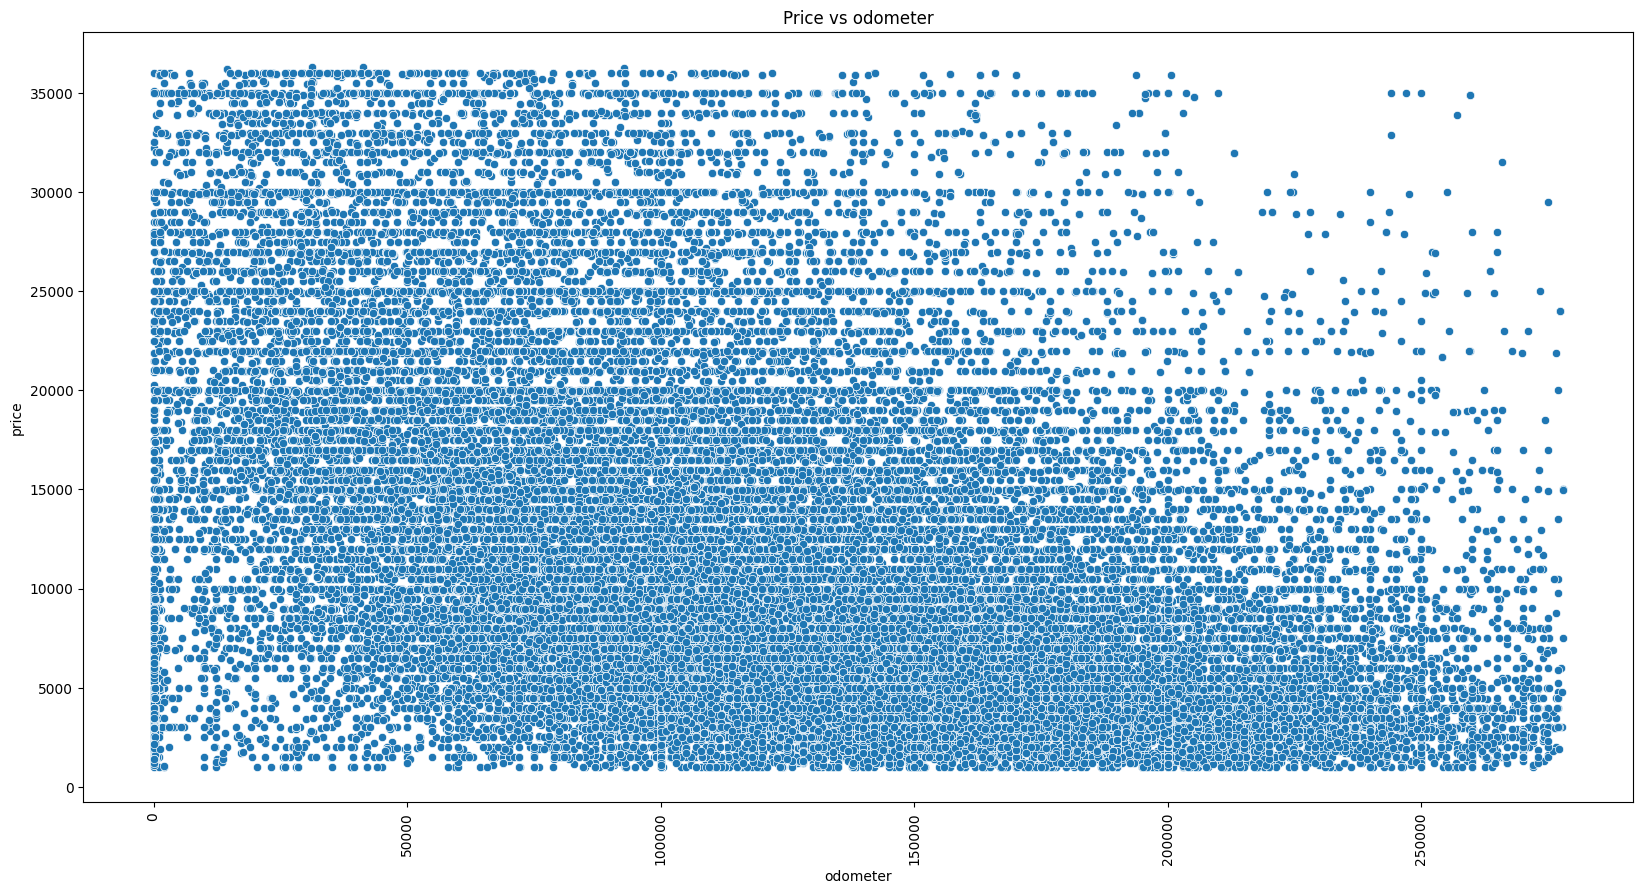

In [106]:
# Select all the numerical columns in our vehicles dataframe
numerical_columns = vehicles.select_dtypes(include=['int64', 'float64']).columns

# Plot each numerical column and price
for col in numerical_columns:
    plt.figure(figsize=(20, 10))
    sns.scatterplot(data=vehicles, x=vehicles[col], y=vehicles['price'])
    plt.title("Price vs " + col)
    plt.xticks(rotation=90)
    plt.show()

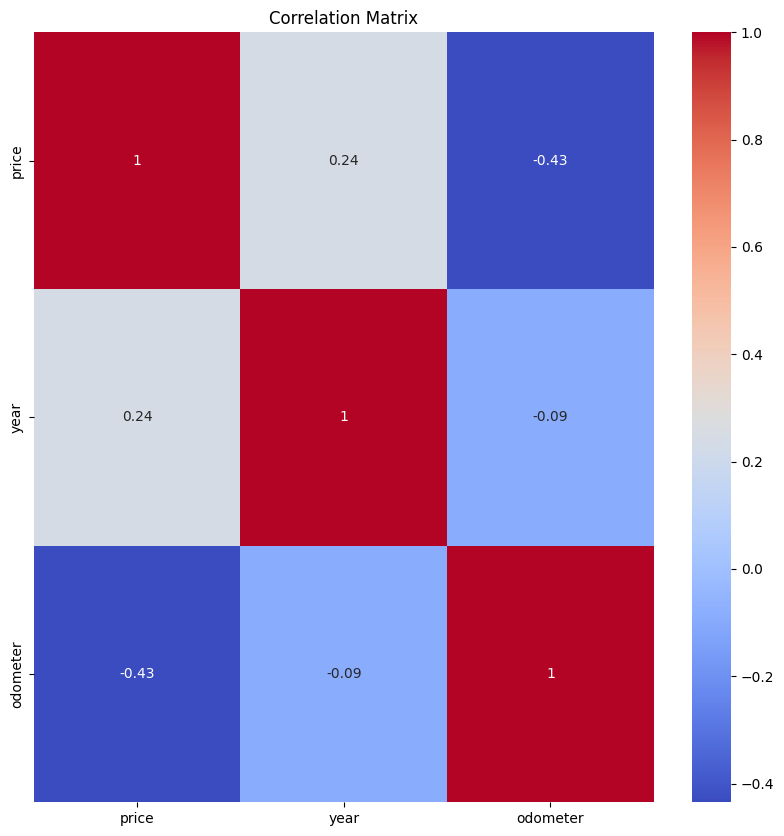

In [107]:
# Plot correlation matrix as heatmap
correlation_matrix = vehicles.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

With this heatmap we can see that price and odometer are negatively correlated, which is expected. The year does not seem to be closely correlated with price.

In [108]:
correlation_matrix['price'].sort_values(ascending=False)

,price
price,1.000000
year,0.240115
odometer,-0.434947


In [109]:
# Converting categorical data into dummy variables
object_columns = vehicles.select_dtypes(include='object').columns

vehicles = pd.get_dummies(vehicles, columns=object_columns, drop_first=True, dtype='int64')

vehicles

,price,year,odometer,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
31,15000,2013.0,128000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
55,19900,2004.0,88000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
59,14000,2012.0,95000.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
65,22500,2001.0,144700.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
73,15000,2017.0,90000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426793,15999,2018.0,36465.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426808,18000,2005.0,130000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426809,18000,1990.0,114400.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426831,9800,1985.0,115000.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [110]:
correlation_matrix = vehicles.select_dtypes(include=['int64', 'float64']).corr().round(2)

correlation_matrix['price'].sort_values(ascending=False)

,price
price,1.00
type_truck,0.31
cylinders_8 cylinders,0.25
year,0.24
size_full-size,0.22
condition_like new,0.15
type_pickup,0.11
drive_rwd,0.09
type_van,0.08
title_status_lien,0.06


I'm going to use this correlation matrix to only select features that are most correlated with price.

In [111]:
# Using correlation matrix to select features
filtered_correlations = correlation_matrix['price'][(correlation_matrix['price'] >= 0.10) | (correlation_matrix['price'] <= -0.10) ].sort_values(ascending=False)
filtered_correlations

filtered_columns = filtered_correlations.index
filtered_columns

Index(['price', 'type_truck', 'cylinders_8 cylinders', 'year',
       'size_full-size', 'condition_like new', 'type_pickup', 'size_mid-size',
       'condition_good', 'fuel_gas', 'condition_fair', 'cylinders_4 cylinders',
       'type_sedan', 'drive_fwd', 'odometer'],
      dtype='object')

In [112]:
# Change original dataset to only have columns that we chose
vehicles = vehicles[filtered_columns]

In [113]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69057 entries, 31 to 426833
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  69057 non-null  int64  
 1   type_truck             69057 non-null  int64  
 2   cylinders_8 cylinders  69057 non-null  int64  
 3   year                   69057 non-null  float64
 4   size_full-size         69057 non-null  int64  
 5   condition_like new     69057 non-null  int64  
 6   type_pickup            69057 non-null  int64  
 7   size_mid-size          69057 non-null  int64  
 8   condition_good         69057 non-null  int64  
 9   fuel_gas               69057 non-null  int64  
 10  condition_fair         69057 non-null  int64  
 11  cylinders_4 cylinders  69057 non-null  int64  
 12  type_sedan             69057 non-null  int64  
 13  drive_fwd              69057 non-null  int64  
 14  odometer               69057 non-null  float64
dtypes: fl

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

We will be building models with three different regression algorithms: Linear, Ridge, and Lasso. We will use Recursive Feature Elimination to determine the best number of features to use for each.

In [114]:
# Separate training data and target
X = vehicles.drop(['price'], axis=1)
y = vehicles[['price']]

In [115]:
# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [116]:
# Error metrics function
def error_metrics(y_train_true, y_train_pred, y_test_true, y_test_pred):

    errors = {}

    # Errors for train data
    errors['Train MAE'] = mean_absolute_error(y_train_true, y_train_pred)
    errors['Train MSE'] = mean_squared_error(y_train_true, y_train_pred)
    errors['Train RMSE'] = np.sqrt(errors['Train MSE'])
    errors['Train R2 Score'] = r2_score(y_train_true, y_train_pred)

    # Errors for test data
    errors['Test MAE'] = mean_absolute_error(y_test_true, y_test_pred)
    errors['Test MSE'] = mean_squared_error(y_test_true, y_test_pred)
    errors['Test RMSE'] = np.sqrt(errors['Test MSE'])
    errors['Test R2 Score'] = r2_score(y_test_true, y_test_pred)

    return errors

model_evaluation = []

In [117]:
# Standardize data using StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
# Instantiate models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

In [119]:
# Create pipelines for models
pipeline_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('rfe', RFE(linear_model)),
    ('model', linear_model)
])

pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('rfe', RFE(ridge_model)),
    ('model', ridge_model)
])

pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('model', lasso_model)
])

In [120]:
# Parameter grids for GridSearchCV
param_grid_linear = {
    'poly__degree': [1, 2],
    'rfe__n_features_to_select': [4, 8, 12]
}

param_grid_ridge = {
    'poly__degree': [1, 2],
    'rfe__n_features_to_select': [4, 8, 12],
    'model__alpha': [0.01, 0.1, 1, 10, 100],
}

param_grid_lasso = {
    'poly__degree': [1, 2],
    'model__alpha': [0.01, 0.1, 1, 10, 100]
}

In [121]:
# Linear regression GridSearch
grid_search_linear = GridSearchCV(pipeline_linear, param_grid_linear, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_linear.fit(X_train, y_train)

print("Linear regression best params: {}".format(grid_search_linear.best_params_))
print("Linear regression best model: {}".format(grid_search_linear.best_estimator_))

Linear regression best params: {'poly__degree': 1, 'rfe__n_features_to_select': 12}
Linear regression best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('rfe',
                 RFE(estimator=LinearRegression(), n_features_to_select=12)),
                ('model', LinearRegression())])


In [122]:
best_linear_model = grid_search_linear.best_estimator_

In [123]:
best_linear_params = grid_search_linear.best_params_

In [124]:
# Create linear regression with best parameters
final_linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=best_linear_params['poly__degree'])),
    ('rfe', RFE(LinearRegression(), n_features_to_select=best_linear_params['rfe__n_features_to_select'])),
    ('model', LinearRegression())
])

In [125]:
# Train final model
final_linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('rfe',
                 RFE(estimator=LinearRegression(), n_features_to_select=12)),
                ('model', LinearRegression())])

In [126]:
y_train_pred = final_linear_pipeline.predict(X_train)
y_test_pred = final_linear_pipeline.predict(X_test)

In [127]:
# Check error of model
error_linear = error_metrics(y_train, y_train_pred, y_test, y_test_pred)

In [128]:
# Check error of model
error_linear['Model Name'] = 'Linear'
error_linear
model_evaluation = pd.DataFrame([error_linear])
model_evaluation

,Train MAE,Train MSE,Train RMSE,Train R2 Score,Test MAE,Test MSE,Test RMSE,Test R2 Score,Model Name
0,4218.311342,3.168238e+07,5628.709912,0.540915,4268.539083,3.254119e+07,5704.488701,0.528904,Linear


In [129]:
# Ridge regression GridSearch
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

print("Linear regression best params: {}".format(grid_search_ridge.best_params_))
print("Linear regression best model: {}".format(grid_search_ridge.best_estimator_))

Linear regression best params: {'model__alpha': 10, 'poly__degree': 2, 'rfe__n_features_to_select': 12}
Linear regression best model: Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('rfe', RFE(estimator=Ridge(), n_features_to_select=12)),
                ('model', Ridge(alpha=10))])


In [130]:
best_ridge_model = grid_search_ridge.best_estimator_

In [131]:
best_ridge_params = grid_search_ridge.best_params_

In [132]:
# Create ridge regression with best parameters
final_ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=best_ridge_params['poly__degree'])),
    ('rfe', RFE(Ridge(), n_features_to_select=best_ridge_params['rfe__n_features_to_select'])),
    ('model', Ridge(alpha=best_ridge_params['model__alpha']))
])

In [133]:
# Train final model
final_ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('rfe', RFE(estimator=Ridge(), n_features_to_select=12)),
                ('model', Ridge(alpha=10))])

In [134]:
y_train_pred = final_ridge_pipeline.predict(X_train)
y_test_pred = final_ridge_pipeline.predict(X_test)

In [135]:
# Check error of model
error_ridge = error_metrics(y_train, y_train_pred, y_test, y_test_pred)

In [136]:
# Check error of model
error_ridge['Model Name'] = 'Ridge'
error_ridge
model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_ridge]))], ignore_index=True)
model_evaluation

,Train MAE,Train MSE,Train RMSE,Train R2 Score,Test MAE,Test MSE,Test RMSE,Test R2 Score,Model Name
0,4218.311342,3.168238e+07,5628.709912,0.540915,4268.539083,3.254119e+07,5704.488701,0.528904,Linear
1,3798.297614,2.684686e+07,5181.395430,0.610982,3841.097989,2.733326e+07,5228.122510,0.604298,Ridge


In [137]:
# Lasso regression GridSearch
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

print("Linear regression best params: {}".format(grid_search_lasso.best_params_))
print("Linear regression best model: {}".format(grid_search_lasso.best_estimator_))

Linear regression best params: {'model__alpha': 1, 'poly__degree': 2}
Linear regression best model: Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=1))])


In [138]:
best_lasso_model = grid_search_lasso.best_estimator_
# best_linear_model.named_steps['rfe'].get_feature_names_out(X_train.columns)

In [139]:
best_lasso_params = grid_search_lasso.best_params_

In [140]:
# Create lasso regression with best parameters
final_lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=best_lasso_params['poly__degree'])),
    ('model', Lasso(alpha=best_lasso_params['model__alpha']))
])

In [141]:
# Train final model
final_lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=1))])

In [142]:
y_train_pred = final_lasso_pipeline.predict(X_train)
y_test_pred = final_lasso_pipeline.predict(X_test)

In [143]:
# Check error of model
error_lasso = error_metrics(y_train, y_train_pred, y_test, y_test_pred)

In [144]:
# Check error of model
error_lasso['Model Name'] = 'Lasso'
error_lasso
model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_lasso]))], ignore_index=True)
model_evaluation

,Train MAE,Train MSE,Train RMSE,Train R2 Score,Test MAE,Test MSE,Test RMSE,Test R2 Score,Model Name
0,4218.311342,3.168238e+07,5628.709912,0.540915,4268.539083,3.254119e+07,5704.488701,0.528904,Linear
1,3798.297614,2.684686e+07,5181.395430,0.610982,3841.097989,2.733326e+07,5228.122510,0.604298,Ridge
2,3271.119884,2.182988e+07,4672.245637,0.683680,3313.921424,2.207083e+07,4697.960610,0.680482,Lasso


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

After creating 3 regression models, we can see that the Lasso model performed the best. According to R2 score, these models aren't extremely accurate in their predictions. Going back and looking at the correlation matrix we created, none of the features were correlated very strongly with price.

Perhaps we would need to go back and see if any of the data we cut out was important or maybe we would need to collect new data entirely that is more applicable to our situation.

I had initially gone back and removed additional features to reduce model complexity and training time.

These are the optimal features that our models chose:

Linear features

In [161]:
# Linear features
linear_feature_names = best_linear_model.named_steps['rfe'].get_feature_names_out(vehicles.columns)
print("Selected feature names:")
print(linear_feature_names)

Selected feature names:
['type_truck' 'cylinders_8 cylinders' 'year' 'size_full-size'
 'type_pickup' 'condition_good' 'fuel_gas' 'condition_fair'
 'cylinders_4 cylinders' 'type_sedan' 'drive_fwd' 'odometer']


In [168]:
linear_model_coefs = best_linear_model.named_steps['model'].coef_
linear_model_coefs = linear_model_coefs.flatten()

In [175]:
# Create dataframe to show features and corresponding coefficients
linear_importance = pd.DataFrame({'Feature': linear_feature_names,
                                  'Coefficient': linear_model_coefs})
linear_importance

,Feature,Coefficient
0,type_truck,1547.013923
1,cylinders_8 cylinders,808.707187
2,year,2173.229677
3,size_full-size,416.730278
4,type_pickup,644.659101
5,condition_good,-856.810981
6,fuel_gas,-1158.614621
7,condition_fair,-906.747068
8,cylinders_4 cylinders,-692.489038
9,type_sedan,-871.568827


In [176]:
# Sort by absolute value of the coefficients to highlight importance
linear_importance['Abs_Coefficient'] = linear_importance['Coefficient'].abs()
linear_importance = linear_importance.sort_values(by='Abs_Coefficient', ascending=False)
linear_importance = linear_importance.drop(columns=['Abs_Coefficient'])
linear_importance

,Feature,Coefficient
11,odometer,-3825.191375
2,year,2173.229677
10,drive_fwd,-1596.867090
0,type_truck,1547.013923
6,fuel_gas,-1158.614621
7,condition_fair,-906.747068
9,type_sedan,-871.568827
5,condition_good,-856.810981
1,cylinders_8 cylinders,808.707187
8,cylinders_4 cylinders,-692.489038


Ridge features

In [198]:
# Get Ridge features chosen
ridge_poly_names = best_ridge_model.named_steps['poly'].get_feature_names_out(X.columns)
selected_features_mask = best_ridge_model.named_steps['rfe'].support_
selected_feature_names = ridge_poly_names[selected_features_mask]

# Get coefficients
ridge_model_coefs = best_ridge_model.named_steps['model'].coef_

ridge_model_coefs = ridge_model_coefs.flatten()

# Importance dataframe
ridge_importance = pd.DataFrame({'Feature': selected_feature_names,
                                 'Coefficient': ridge_model_coefs})
ridge_importance

,Feature,Coefficient
0,cylinders_8 cylinders,1646.698013
1,year,5956.087930
2,cylinders_4 cylinders,-1079.013663
3,type_sedan,-1107.509302
4,drive_fwd,-1613.263457
5,odometer,-2854.810200
6,type_truck year,648.896999
7,type_truck fuel_gas,-971.929070
8,year^2,1171.782903
9,year odometer,-733.939029


In [199]:
# Sort by absolute value of the coefficients to highlight importance
ridge_importance['Abs_Coefficient'] = ridge_importance['Coefficient'].abs()
ridge_importance = ridge_importance.sort_values(by='Abs_Coefficient', ascending=False)
ridge_importance = ridge_importance.drop(columns=['Abs_Coefficient'])
ridge_importance

,Feature,Coefficient
1,year,5956.087930
5,odometer,-2854.810200
0,cylinders_8 cylinders,1646.698013
4,drive_fwd,-1613.263457
8,year^2,1171.782903
3,type_sedan,-1107.509302
2,cylinders_4 cylinders,-1079.013663
7,type_truck fuel_gas,-971.929070
11,drive_fwd odometer,895.089368
9,year odometer,-733.939029


Lasso features

In [202]:
# Get Lasso features chosen
lasso_feature_names = best_lasso_model.named_steps['poly'].get_feature_names_out(X.columns)

# Get coefficients
lasso_model_coefs = best_lasso_model.named_steps['model'].coef_

lasso_model_coefs = lasso_model_coefs.flatten()

# Identify non-zero coefficients
non_zero_indices = np.where(lasso_model_coefs != 0)[0]
non_zero_features = lasso_feature_names[non_zero_indices]
non_zero_coefficients = lasso_model_coefs[non_zero_indices]

# Importance dataframe
lasso_importance = pd.DataFrame({'Feature': non_zero_features,
                                 'Coefficient': non_zero_coefficients})
lasso_importance

,Feature,Coefficient
0,type_truck,1082.337514
1,cylinders_8 cylinders,1089.076175
2,year,5244.510726
3,size_full-size,320.108563
4,type_pickup,77.428593
...,...,...
97,cylinders_4 cylinders drive_fwd,143.129122
98,cylinders_4 cylinders odometer,239.214451
99,type_sedan odometer,342.006925
100,drive_fwd odometer,493.083754


In [213]:
original_features = {col: 0 for col in X.columns}
for feature, coef in zip(non_zero_features, non_zero_coefficients):
    for original_feature in feature.split(' '):
        if original_feature in original_features:
            original_features[original_feature] += coef


In [215]:
lasso_importance = pd.DataFrame({'Feature': list(original_features.keys()),
                                        'Coefficient': list(original_features.values())})
lasso_importance

,Feature,Coefficient
0,type_truck,803.031148
1,cylinders_8 cylinders,0.000000
2,year,4425.218678
3,size_full-size,415.856751
4,condition_like new,0.000000
5,type_pickup,-413.950197
6,size_mid-size,109.041668
7,condition_good,-489.072515
8,fuel_gas,-1110.966868
9,condition_fair,80.394218


In [216]:
# Sort by absolute value of the coefficients to highlight importance
lasso_importance['Abs_Coefficient'] = lasso_importance['Coefficient'].abs()
lasso_importance = lasso_importance.sort_values(by='Abs_Coefficient', ascending=False)
lasso_importance = lasso_importance.drop(columns=['Abs_Coefficient'])
lasso_importance

,Feature,Coefficient
2,year,4425.218678
13,odometer,-2839.491494
8,fuel_gas,-1110.966868
11,type_sedan,-994.017475
0,type_truck,803.031148
7,condition_good,-489.072515
3,size_full-size,415.856751
5,type_pickup,-413.950197
6,size_mid-size,109.041668
9,condition_fair,80.394218


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

After studying over 426k used car sales, we have a good understanding of what drives the sale of a car. As you can see by the graph, certain features of the car make it more valuable and others will make it less valuable.

The biggest impact on the price came from the year of the car. The year of the car has a positive impact on sale price, the newer the car the higher the price.The next biggest impact came from the mileage. More mileage leads to lower value and lower sale price. Out of all the types of vehicles sold, trucks had the biggest positive impact on price. It seems that sedans sold at a lower price than other vehicles that were listed.



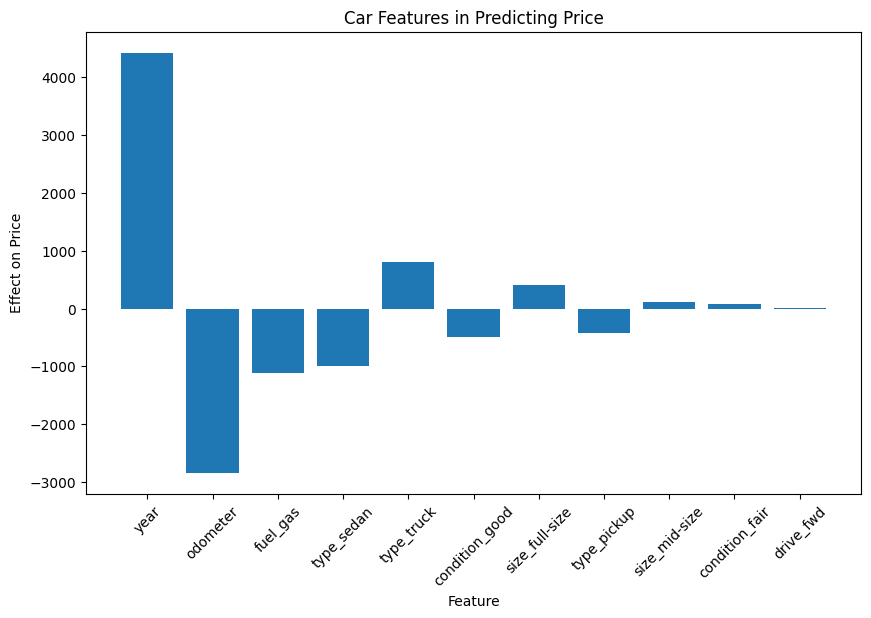

In [241]:
plt.figure(figsize=(10, 6))
non_zero_coefficients = lasso_importance[lasso_importance['Coefficient'] != 0]
plt.bar(non_zero_coefficients['Feature'], non_zero_coefficients['Coefficient'])
plt.ylabel('Effect on Price')
plt.xlabel('Feature')
plt.title('Car Features in Predicting Price')
plt.xticks(rotation=45)
plt.show()